In [2]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
# import libpng as png
from PIL import Image

In [56]:
file = []
for fname in glob.glob('Data/10/CBCT/*', recursive=False):
    data = dicom.dcmread(fname)
    file.append(data)

print("file count: {}".format(len(file)))

file count: 200


In [57]:
ps = file[0].PixelSpacing
ss = file[0].SliceThickness
ax_aspect = ps[1]/ps[0]
sag_aspect = ps[1]/ss
cor_aspect = ss/ps[0]

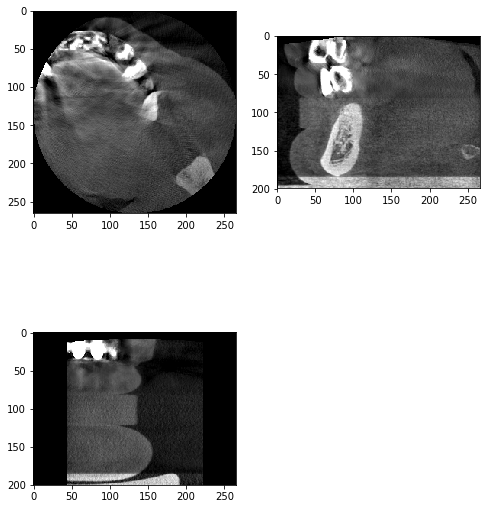

In [58]:
# create 3D array
img_shape = list(file[0].pixel_array.shape)
img_shape.append(len(file))
img3d = np.zeros(img_shape)

for i, s in enumerate(file):
    image_2d = s.pixel_array.astype(float)
    image_2d_scaled = (np.maximum(image_2d,0) / image_2d.max()) * 255.0
    image_2d_scaled = np.uint8(image_2d_scaled)
    img3d[:, :, i] = image_2d_scaled

# plot 3 orthogonal slices
plt.figure(figsize=(8, 10))
a1 = plt.subplot(2, 2, 1)
plt.imshow(img3d[:, :, 35], cmap='gray')
a1.set_aspect(ax_aspect)

a2 = plt.subplot(2, 2, 2)
plt.imshow(img3d[:, 120, :].T, cmap='gray')
a2.set_aspect(sag_aspect)

a3 = plt.subplot(2, 2, 3)
plt.imshow(img3d[35, :, :].T, cmap='gray')
a3.set_aspect(cor_aspect)

plt.show()

In [59]:
path = 'Data/10/'
path_ax = os.path.join(path, 'Axial')
if not os.path.exists(path_ax):
        os.makedirs(path_ax)
        
for i in range(len(file)):
    img = img3d[:, :, i]
    filename = "{:d}.bmp".format(i+1)
    cv2.imwrite(os.path.join(path_ax, filename), img)

In [60]:
path = 'Data/10/'
path_sag = os.path.join(path, 'Sagital')
if not os.path.exists(path_sag):
        os.makedirs(path_sag)
        
for i in range(len(file)):
    img = img3d[:, i, :].T
    filename = "{:d}.bmp".format(i+1)
    cv2.imwrite(os.path.join(path_sag, filename), img)

In [ ]:
path = 'Data/10/'
path_cor = os.path.join(path, 'Coronal')
if not os.path.exists(path_cor):
        os.makedirs(path_cor)
        
for i in range(len(file)):
    img = img3d[i, :, :].T
    filename = "{:d}.bmp".format(i+1)
    cv2.imwrite(os.path.join(path_cor, filename), img)